## DATA READING AND LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
plt.rcParams["font.family"] = "DejaVu Sans"


df_normalized = pd.read_csv('df_normalized.csv')
df_movies = pd.read_csv('movies_clean.csv')
df_movies.drop('year', axis=1, inplace=True)


#### CORRELATION

In [ ]:
# Correlation graphic between object and numeric variables
corr_matrix = df_normalized.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Gráfico de Correlación')
plt.show()

In [ ]:
# Most higher correaltions
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs.drop_duplicates().reset_index()

corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

top_corr = corr_pairs[abs(corr_pairs['Correlation']) < 1].nlargest(10, 'Correlation')

print(top_corr)


## REGRESSION

### IMPORTING, CHARGING, ASSIGNATION OF VARIABLES

#### BUDGET vs GROSS

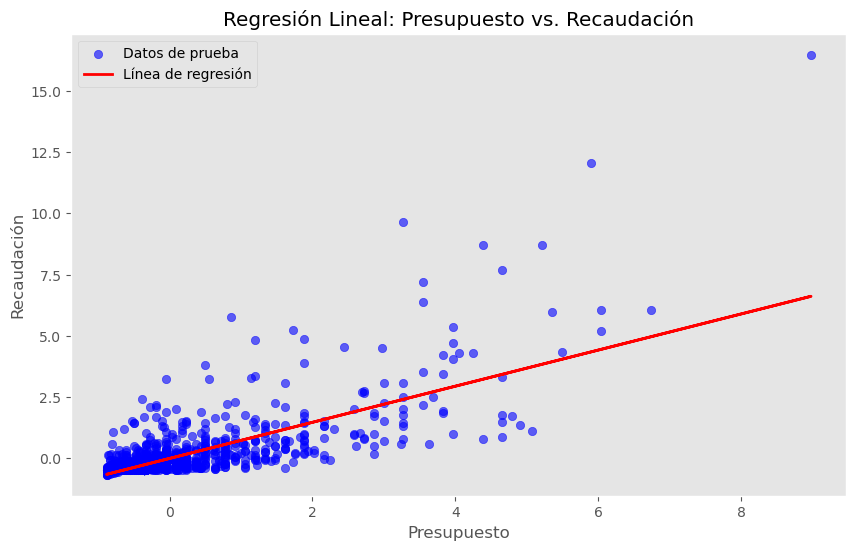

MSE: 0.5223071842706395, MAE: 0.35406412304805107, R²: 0.5680579991408443


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir las variables independientes (X) y dependientes (y)
X = df_normalized[['budget']]  # Asegúrate de que X es un DataFrame
y = df_normalized['gross']      # y puede ser una Serie

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title('Regresión Lineal: Presupuesto vs. Recaudación')
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación')
plt.legend()
plt.grid()
plt.show()

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, MAE: {mae}, R²: {r2}')